In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
    labels = []
    images = []
    with open(filename) as file:
        next(file)
        csv_reader = csv.reader(file)
        for row in csv_reader:
            row = np.array(row).astype(np.float)
            labels.append(row[0])
            images.append(np.array(row[1:].reshape(28, 28)))
    return(np.array(images), np.array(labels))

path_sign_mnist_train = '../data/sign-language-mnist/sign_mnist_train.csv'
path_sign_mnist_test = '../data/sign-language-mnist/sign_mnist_test.csv'
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, -1)
testing_images = np.expand_dims(testing_images, -1)

# # Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1.0/255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])


# Can either keep labels in integer form and use 'sparse_categorical_crossentropy' loss
# or use tf.keras.utils.to_categorical to onehot data and use 'categorical_crossentropy' loss
training_labels = tf.keras.utils.to_categorical(training_labels, 25)
testing_labels = tf.keras.utils.to_categorical(testing_labels, 25)

training_generator = train_datagen.flow(
    training_images, 
    training_labels, 
    batch_size = 20)

validation_generator = validation_datagen.flow(
    testing_images, 
    testing_labels, 
    batch_size = 20)

# Compile Model. 
model.compile(
    loss = 'categorical_crossentropy', 
    metrics = ['acc'], 
    optimizer = 'adam')


# Train the Model
history = model.fit_generator(
    training_generator, 
    validation_data = validation_generator,
    epochs = 2
)

model.evaluate(testing_images, testing_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
1373/1373 [==============================] - 7s 5ms/step - loss: 2.4787 - acc: 0.2335 - val_loss: 1.5935 - val_acc: 0.4709
Epoch 2/2
1373/1373 [==============================] - 7s 5ms/step - loss: 1.6012 - acc: 0.4815 - val_loss: 0.8630 - val_acc: 0.6790


[117.67676544189453, 0.5892359018325806]

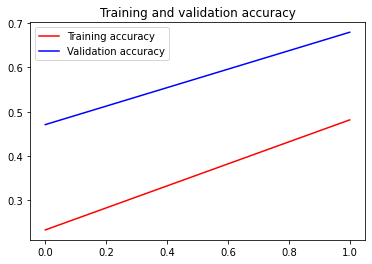

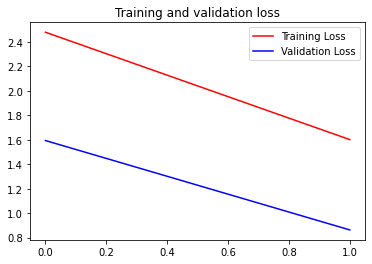

In [5]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()